In [17]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data (1).csv


In [0]:
from   sklearn.model_selection import train_test_split
from   sklearn.linear_model    import LogisticRegression
from   sklearn.metrics         import classification_report
from   sklearn                 import metrics
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
#version of packages
print('Numpy: {}.'.format(np.__version__))
print('Pandas: {}.'.format(pd.__version__))
print('Seaborn: {}.'.format(sns.__version__))

Numpy: 1.16.5.
Pandas: 0.24.2.
Seaborn: 0.9.0.


In [0]:
#column names of dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

#load dataset
dataset = pd.read_csv("pima-indians-diabetes.data.csv", header=None, names=col_names)

In [20]:
dataset.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
dataset.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
#split dataset into features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

#features
X = dataset[feature_cols] 

#target variable
y = dataset.label

In [0]:
#split X and y into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [24]:
#create the model (using the default parameters)
model = LogisticRegression()

#fit the model with data
model.fit(X_train,y_train)

#predict by trained model
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
#evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       130
           1       0.77      0.58      0.66        62

    accuracy                           0.81       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.80      0.81      0.80       192



In [27]:
#create the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

Text(0.5, 257.44, 'Predicted label')

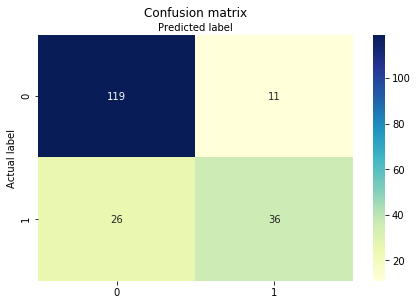

In [28]:
#plot the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')